##### 정의: 앙상블 러닝 방법론 중 한가지 방법론.  랜덤 포레스트와 GBM은 앙상블 러닝 기법의 양대 산맥.

##### Gradient Boosting = Gradient Descent + Boosting

* GBM을 통해서 Regresstion , Classification, Ranking 모두에 적용할 수 있다. 하지만 나열 순서대로 난이도가 올라감.  Boosting이란 약한 분류기를 결합해서 강한 분류기를 만드는 과정이다. GBM의 대표적인 알고리즘은 Light GBM과 XG Moost가 있다. 

* Light GBM은 학습에 걸리는 시간이 가장 적다. 성능도 XG Boosting과 차이가 나지 않지만 10,000건 이하의 데이터셋을 사용하는 경우 과적합을 발생시키기 쉽다. XGB와 LGBM의 성능차이는 사실 크게 차이가 없다. 얼마나 하이퍼 파라미터 튜닝을 잘하느냐가 성능 차이를 만든다

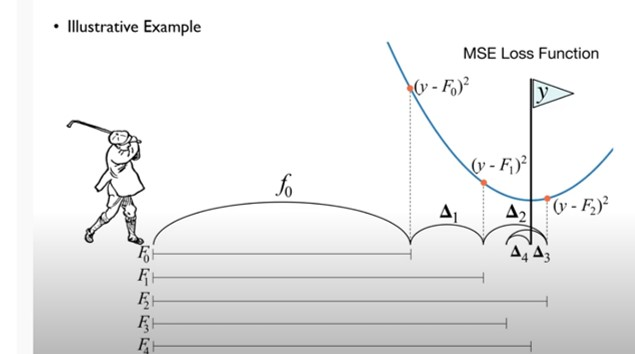

In [7]:
from IPython.display import Image
Image("pic2.jpg")

* 이해를 위한 설명 : 우리가 가고 싶어하는 타켓이 있다. 처음에는 f0 만큼 떨어졌다. 차이는 y-f0만큼 생겼다. 이를 줄이기 위한 것을 타겟팅으로 하여 분석을 진행한다. 그 결과 △1 거리만큼 더 가까워졌다. 다음 타겟은 y-f0-△1을 줄이는 것을 목표로 다시 분석을 진행한다. 세 번째에는 목표를 넘어가게 되고 다시 롤백하기 위해 새로운 함수로 분석한다. 이렇게 'residual' 즉, 목표값과 분석값의 잔차를 줄이기 위한 것을 목표로 진행하기 때문에 Boosting이라는 표현을 쓴다. 

### Why gradient? 

* 위에 그림에서 보면 우리의 타켓은 기울기가 0인 값으로 한다. 첫 번째 결과에서 기울기는 상대적으로 크다. 따라서 기울기의 절대값을 줄이는 방향으로 도달해야 목표값과 가까워질 수 있다. 이처럼 목표값에 가까워지는 것은 결국에 기울기를 줄이는 것과 같다하여 'gradient'라는 표현을 쓴다.

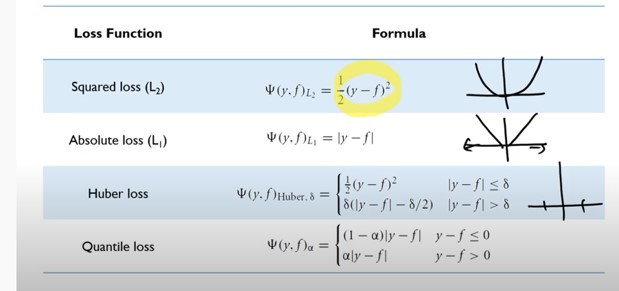

In [8]:
from IPython.display import Image
Image("pic3.jpg")

* GBM은 결국에 실제값과 분석값의 차이를 줄이는 것을 목표로 진행된다. 이 때 차이를 'Loss'라고 하며 위와 같은 여러가지 함수로 'Loss'를 경우에 따라 정의한다. 첫 번째는 이차 함수 그래프로 나타낸다. 두번째는 절대값으로 1차 함수의 형태로 나타난다. 세번째는 목표치 근사 위치에는 2차곡선을 그 밖에서는 1차 직선의 형태로 나타낸다.

### GBM 의 문제점

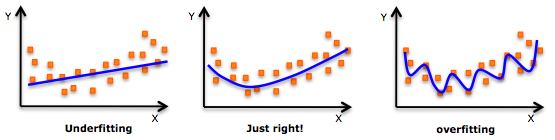

In [10]:
from IPython.display import Image
Image("pic4.png")

* Overfitting이 발생할 수 있다. 'Overfitting'이란 데이터를 과하게 학습해서 발생하는 문제이다. 위 그림에서 처럼 과적합이 일어나면 지나치게 복잡한 결과값이 나온다. 가운데처럼 데이터의 양에 맞게 일반적으로 데이터를 대표할 수 있는 결과값이 나와야 하는데 지나치게 데이터를 분석하게되면 과적합이 일어난다. 우리는 '적당한' 결과를 찾아야하는데 이를 regulariztion이라고 한다.

* sub 샘플링은 일반화 성능을 확보하기 위해서 전체 데이터를 학습하는 것이 아닌 데이터의 일부만을 학습하여 과적합이 되는 것을 막는 방법이다.

### Hyperparameter 튜닝

 * 하이퍼 파라미터 튜닝은 learning_rate, n_estimators, subsample, max_depth , min_samples_split , min_samples_leaf 을 주로 튜닝한다.  
 loss는 보통은 defalut로 사용한다.
 learning rate는 값이 너무 적으면 학습이 더디고, 너무 크면 튈수도 있다. 보통 0.05~0.2 사이의 값을 가진다. 
 subsampling은 과적합을 예방하기 위해 사용하는데, 0.7-0.9 정도로 사용한다.
 ax_depth , min_samples_split , min_samples_leaf은 데이터 형태에 따라서 최적값이 달라지기 때문에 보통 2-20 정도의 정수를 사용하며, grid search를 통해서 최적 파라미터를 찾아간다. 